In [173]:
import github3, json

import os
from datetime import date
import dateutil.relativedelta

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import requests

import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time
from fbprophet import Prophet

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

from scipy import stats

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import plotly.plotly as py
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF

init_notebook_mode(connected=True)

In [ ]:
## Import all the quarter 2 data
q2_2018 = pd.read_csv('Divvy_Trips_2018_Q2.csv')
q2_2017 = pd.read_csv('Divvy_Trips_2017_Q2.csv')
q2_2016_4 = pd.read_csv('Divvy_Trips_2016_04.csv')
q2_2016_5 = pd.read_csv('Divvy_Trips_2016_05.csv')
q2_2016_6 = pd.read_csv('Divvy_Trips_2016_06.csv')
q2_2015 = pd.read_csv('Divvy_Trips_2015-Q2.csv')

In [ ]:
## Concat the 2016 data into one df
q2_2016 = pd.concat([q2_2016_4, q2_2016_5, q2_2016_6])

In [ ]:
## Rename columns to match others
q2_2015.rename(columns={'starttime':'start_time', 'stoptime':'end_time'}, inplace=True)
q2_2016.rename(columns={'starttime':'start_time', 'stoptime':'end_time'}, inplace=True)

In [ ]:
## Find the number of check-outs per station
station_counts_from = pd.DataFrame(q2['from_station_id'].value_counts())

In [ ]:
## Top 5 Stations with the most check-outs
station_counts_from.head()

In [ ]:
## Find the number of check-ins per station
station_counts_to= pd.DataFrame(q2['to_station_id'].value_counts())

In [ ]:
## Top 5 stations with the most check-ins
station_counts_to.head()

In [ ]:
## Create a DataFrame with the check-outs and check-ins
## Create a columns that sums check-outs and check-ins
station_counts = pd.concat([station_counts_from, station_counts_to], axis=1)
station_counts.rename(columns={'from_station_id':'checkouts', 'to_station_id':'checkins'}, inplace=True)
station_counts['total'] = station_counts['checkouts'] + station_counts['checkins']

In [ ]:
## After some research, we will use the top 26 stations
## The top 26 stations have a total > 50,000
station_counts_26 = station_counts.sort_values('total', ascending=False).head(26)
stations = list(station_counts_26.index)

In [ ]:
## Extract just trips that involve the 26 stations in the model
q2_stations = q2[(q2['from_station_id'].isin(stations)) | (q2['to_station_id'].isin(stations))]

In [ ]:
q2_stations.head(3)

In [ ]:
## Explore the number of trips overall and in our model

total_trip_count = q2['trip_id'].count()
top_26_count = q2_stations['trip_id'].count()
percent = round(top_26_count/total_trip_count, 3) * 100

print("Of the {} total trips, {} involve one of our 26 stations. That's {}%".format(total_trip_count, 
                                                                                    top_26_count,
                                                                                    percent))

In [1]:
GITHUB_TOKEN = '1f06cf76a61a667e13acb23887c0c10e975465e7'
ORG = 'YFA19SCM50H'                  
REPO ='YFA19SCM50H'
FILENAME_ISSUES = REPO + 'Test.json'
gh = github3.login(token=GITHUB_TOKEN)

NameError: name 'github3' is not defined

In [ ]:
angular_material = 'angular_angular.json'
f = open('angular_angular.json', 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 24 months

for i in range(24):
        
        f = open(angular_material, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:angular/angular' #to be updated
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)

In [4]:
f = open('angular_material.json', 'w')
f.close()


today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 24 months

for i in range(24):
        
        f = open(FILENAME_ISSUES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:angular/angular'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(2)
            

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'sear

In [ ]:
angular_angular_cli = 'angular_angular_cli.json'
f = open(angular_angular_cli, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 24 months

for i in range(24):
        
        f = open(angular_angular_cli, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:angular/angular-cli' #to be updated
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)

In [ ]:
angular_google_maps = 'angular_google_maps.json'
f = open(angular_google_maps, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 24 months

for i in range(24):
        
        f = open(angular_google_maps, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:SebastianM/angular-google-maps' #to be updated
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)

In [ ]:
d3_d3 = 'd3_d3.json'
f = open(d3_d3, 'w')
f.close()

gh = github3.login(token=GITHUB_TOKEN)

today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 24 months

for i in range(24):
        
        f = open(d3_d3, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        repo = 'repo:d3/d3' #to be updated
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(10)

## 2) A Line Chart to plot the issues for every Repo

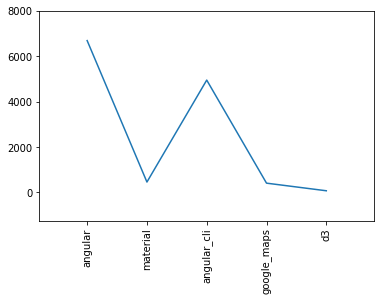

In [179]:
angular_angular = 'angular_angular.json'
angular_material = 'angular_material.json'
angular_angular_cli = 'angular_angular_cli.json'
angular_google_maps = 'angular_google_maps.json'
d3_d3 = 'd3_d3.json'
issues1 = [json.loads(line) for line in open(angular_angular)]
issues2 = [json.loads(line) for line in open(angular_material)]
issues3 = [json.loads(line) for line in open(angular_angular_cli)]
issues4 = [json.loads(line) for line in open(angular_google_maps)]
issues5 = [json.loads(line) for line in open(d3_d3)]
df1 = DataFrame(issues1)
df2 = DataFrame(issues2)
df3 = DataFrame(issues3)
df4 = DataFrame(issues4)
df5 = DataFrame(issues5)


x = [1, 2, 3, 4,5]
y = (len(df1),len(df2),len(df3),len(df4),len(df5))
labels = ['angular', 'material', 'angular_cli', 'google_maps','d3']

plt.plot(x, y)
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [5]:
FILENAME_ISSUES = 'angular_angular.json'
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
df = DataFrame(issues)
df.tail()


,issue_number,created_at,closed_at,labels,State,Author
6860,20615,2017-11-24,2017-11-24,[],closed,sunilkumarsingh
6861,20614,2017-11-24,2017-11-27,[],closed,vinjog
6862,20613,2017-11-24,2017-11-24,[],closed,rajesh-siliconharborlabs
6863,20612,2017-11-24,2017-11-24,[],closed,aryanisml
6864,20611,2017-11-24,None,"[comp: core, freq1: low, severity1: confusing,...",open,UserGalileo


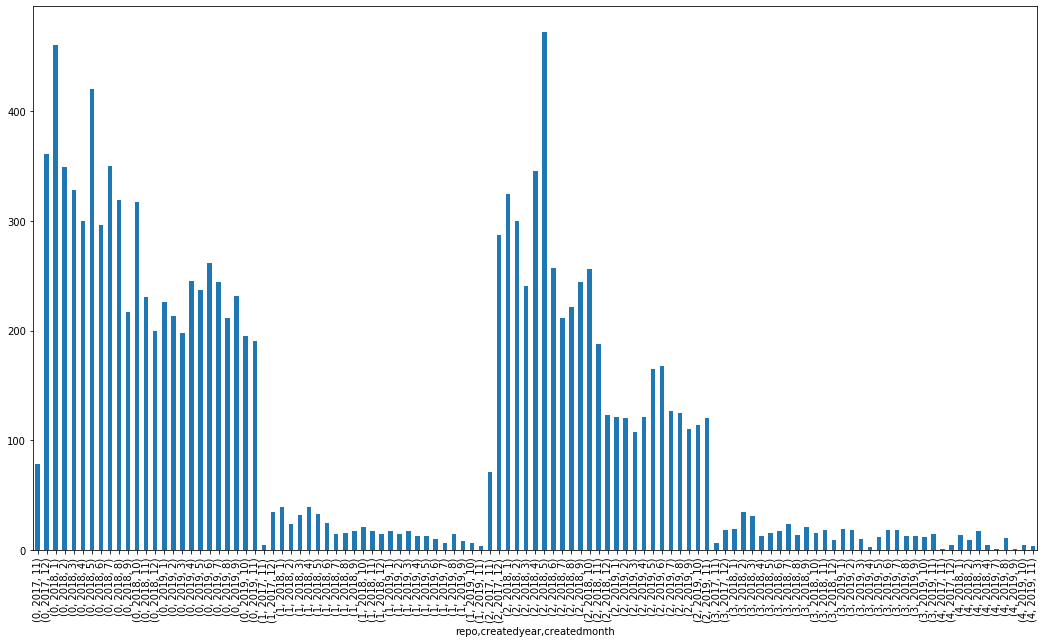

In [160]:
#3) A Bar Chart to plot the issues created for every month for every Repo
dd = [df1,df2,df3,df4,df5]
for i,d in enumerate(dd):
    d['repo'] = i
    d['createdyear'] = d['created_at'].astype('datetime64[ns]').dt.year
    d['createdmonth'] = d['created_at'].astype('datetime64[ns]').dt.month

frames = [df1,df2,df3,df4,df5]
result = pd.concat(frames)

result.groupby(['repo','createdyear','createdmonth'])['created_at'].count().plot.bar(figsize=(18,10))


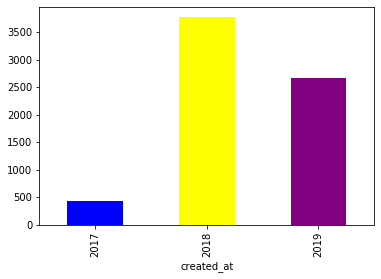

In [7]:
#4 A Bar Chart to plot the starts for every Repo
a = df['created_at'].groupby(by=[year]).count()
a.plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple'], grid=False)

#### A Bar Chart to plot the forks for every Repo

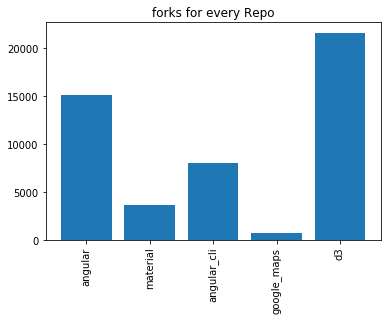

In [177]:
a = []
a.append(requests.get("https://api.github.com/repos/angular/angular").json()['forks_count'])

a.append(requests.get("https://api.github.com/repos/angular/material").json()['forks_count'])

a.append(requests.get("https://api.github.com/repos/angular/angular-cli").json()['forks_count'])

a.append(requests.get("https://api.github.com/repos/SebastianM/angular-google-maps").json()['forks_count'])

a.append(requests.get("https://api.github.com/repos/d3/d3").json()['forks_count'])

plt.bar(x, y)
plt.xticks(x, labels, rotation='vertical')
plt.title('forks for every Repo')

x = ['angular_angular', 'angular_material', 'angular_angular_cli', 'angular_google_maps','d3_d3']
y = (a[0],a[1],a[2],a[3],a[4])


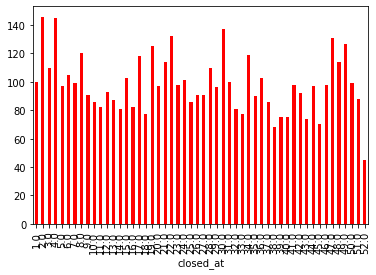

In [9]:
#6) A Bar Chart to plot the issues closed for every week for every Repo
week = pd.DatetimeIndex(df['closed_at']).week
a = DataFrame(week)
tmp = a.groupby(['closed_at']).closed_at.count()
tmp.plot(kind='bar',  color=['red'], grid=False)

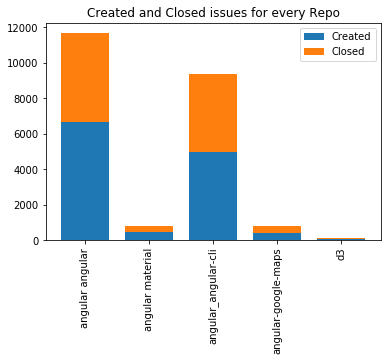

In [169]:
#7 A Stack-Bar Chart to plot the created and closed issues for every Repo
a11=len([df1['created_at'].isna()==False])
b2=len(df1[df1['closed_at'].isna()==False])
a1=len(df2[df2['created_at'].isna()==False])
b3=len(df2[df2['closed_at'].isna()==False])
a2=len(df3[df3['created_at'].isna()==False])
b4=len(df3[df3['closed_at'].isna()==False])
a3=len(df4[df4['created_at'].isna()==False])
b5=len(df4[df4['closed_at'].isna()==False])
a4=len(df5[df5['created_at'].isna()==False])
b6=len(df5[df5['closed_at'].isna()==False])

Created_Count = (a11,a1,a2,a3,a4)
Closed_Count = (b2,b3,b4,b5,b6)
N=5
ind = np.arange(N)
width = 0.75

plt.title('Created and Closed issues for every Repo')
plt.xticks(ind, ('angular angular', 'angular material', 'angular_angular-cli', 'angular-google-maps', 'd3'),rotation='vertical')
p1 = plt.bar(ind, Created_Count, width)
p2 = plt.bar(ind, Closed_Count,width, bottom=Created_Count)
plt.legend((p1[0], p2[0]), ('Created', 'Closed'))



In [64]:
#8 1) The day of the week maximum number of issues created
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet()
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#forcast_fig1 = m.plot(forecast)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
maxno = []
flag = 0
for i in range(len(forecast)-1):
    if forecast['yhat'][i]>forecast['yhat'][flag]:
        flag = i
    if forecast['ds'][i].week != forecast['ds'][i+1].week:
        maxno.append(flag)
        flag = i
tmp = pd.DatetimeIndex(forecast['ds'][maxno]).dayofweek
print("The day of the week maximum number of issues created is Wednesday")

The day of the week maximum number of issues created is Wednesday


In [66]:
#2) The day of the week maximum number of issues closed
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet()
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#forcast_fig1 = m.plot(forecast)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
maxno = []
flag = 0
for i in range(len(forecast)-1):
    if forecast['yhat'][i]>forecast['yhat'][flag]:
        flag = i
    if forecast['ds'][i].week != forecast['ds'][i+1].week:
        maxno.append(flag)
        flag = i
tmp = pd.DatetimeIndex(forecast['ds'][maxno]).dayofweek
print("The day of the week maximum number of issues created is Tuesday")

The day of the week maximum number of issues created is Tuesday


In [68]:
# 3) The month of the year that has maximum number of issues closed
maxmon = []
c = forecast['yhat'][i]
for i in range(len(forecast)-1):
    if forecast['ds'][i].month != forecast['ds'][i+1].month:
        maxmon.append(c)
        c = 0
    c += forecast['yhat'][i+1]
#maxmon.index(max(maxmon))
#print("The day of the week maximum number of issues created is Tuesday")
print(maxmon.index(max(maxmon[0:2]))+11)
print(maxmon.index(max(maxmon[2:14]))-1)
print(maxmon.index(max(maxmon[14:26]))-13)
print(maxmon.index(max(maxmon[26:36]))-25)
print("The month of the year that has maximum number of issues closed are January")

12
1
1
1
The month of the year that has maximum number of issues closed are July


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


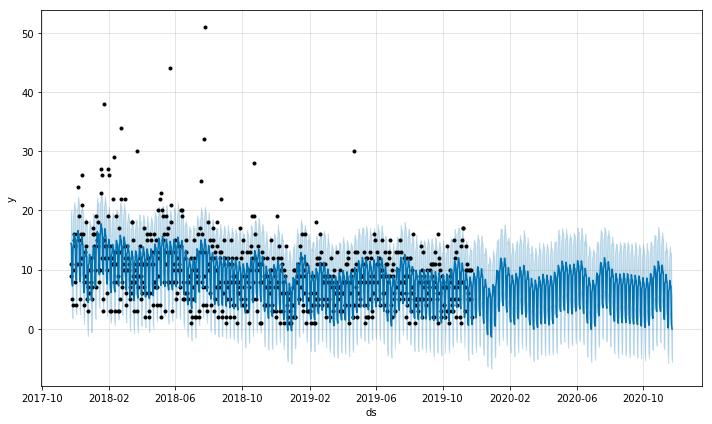

In [405]:
#4 Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.
a = df[['created_at','dow']]
b = a.groupby(by=['created_at'],as_index=False).count()
tmp = a['dow']
b.columns = ['ds', 'y']
m = Prophet()
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forcast_fig1 = m.plot(forecast)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



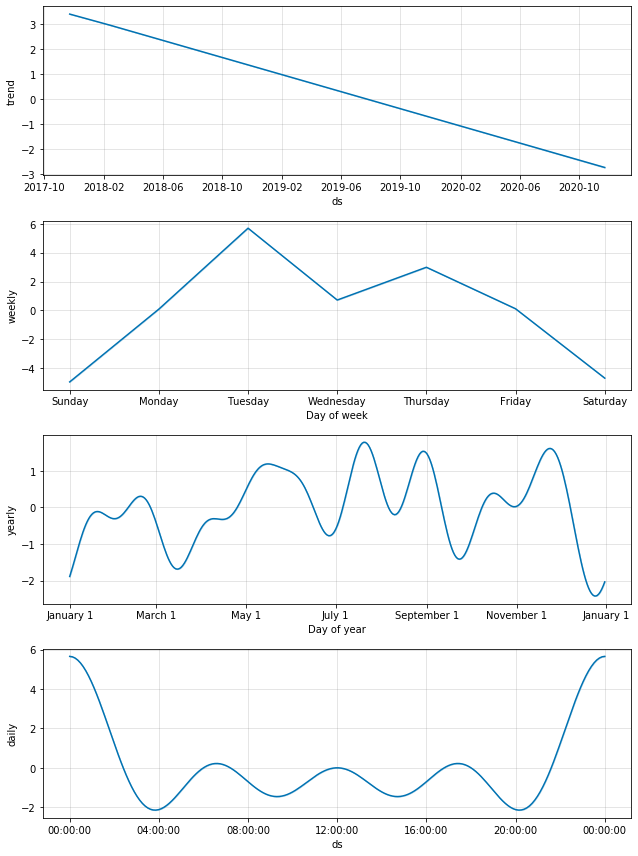

In [182]:
#5)Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [97]:
#6. Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly
ORG = 'angular'                  
REPO ='angular'
FILENAME_PULL = REPO + 'pull.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_PULL, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_PULL, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:pr'
        repo = 'repo:angular/angular'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)
FILENAME_PULL = REPO + 'pull.json'
pull = [json.loads(line) for line in open(FILENAME_PULL)]
df_pull = DataFrame(pull)
#df_pull.columns     

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:r

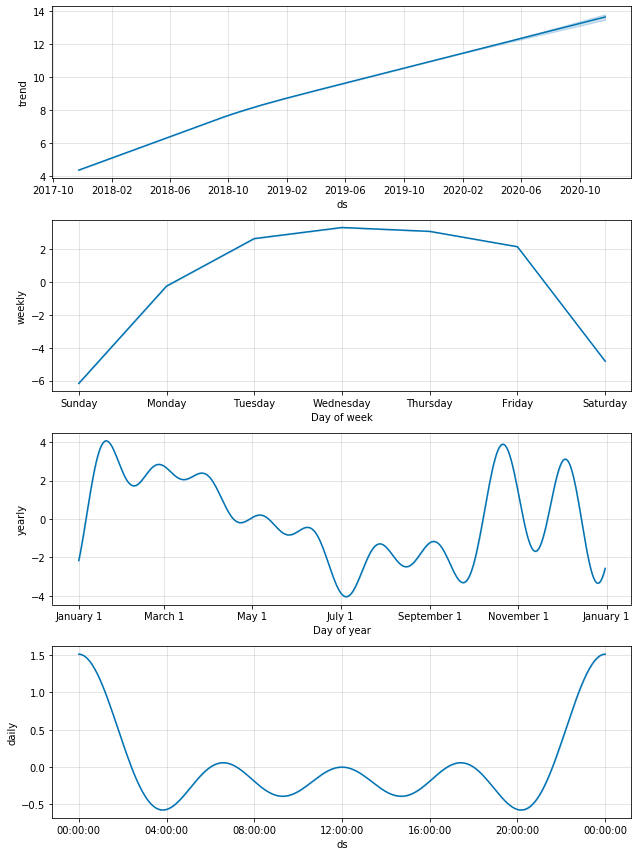

In [183]:
a = df_pull[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [771]:
#7. Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='angular'
FILENAME_COMMITS = REPO + 'commits.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_COMMITS, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_COMMITS, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:commits'
        repo = 'repo:angular/angular'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)
#df_pull.columns     

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a

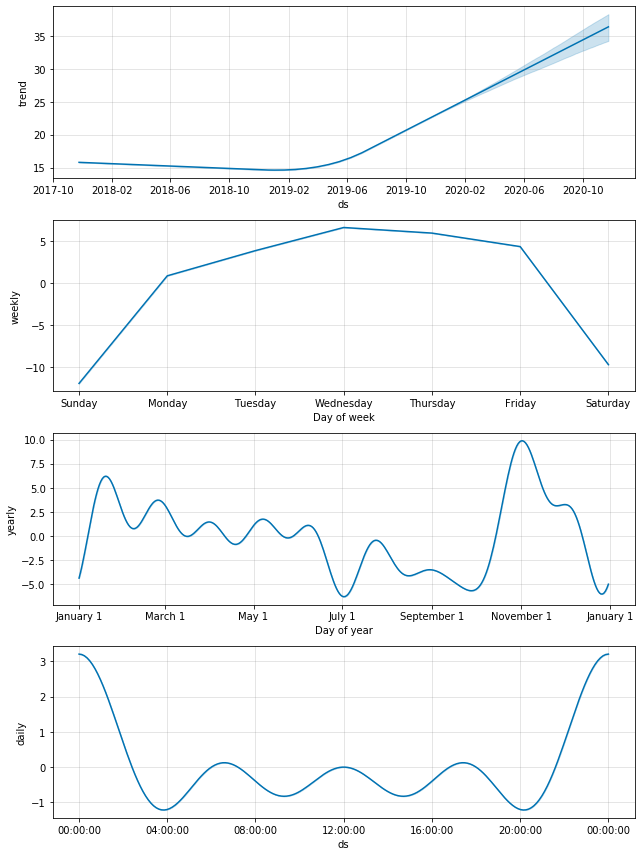

In [184]:
FILENAME_COMMITS = REPO + 'commits.json'
commits = [json.loads(line) for line in open(FILENAME_COMMITS)]
df_commits = DataFrame(commits)
a = df_commits[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [773]:
# 8. Plot the branches forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='angular'
FILENAME_BRANCHES = REPO + 'branches.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_BRANCHES, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_BRANCHES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:branches'
        repo = 'repo:angular/angular'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a

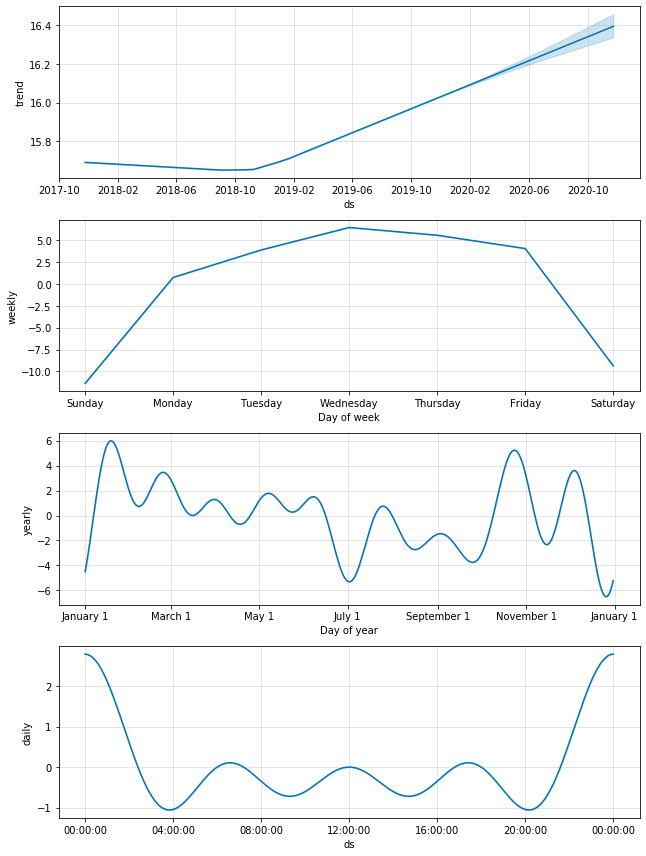

In [185]:
FILENAME_BRANCHES = REPO + 'branches.json'
branches = [json.loads(line) for line in open(FILENAME_BRANCHES)]
df_branches= DataFrame(branches)
a = df_branches[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [775]:
#9. Plot the contributors forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='angular'
FILENAME_CONTRIBUTORS = REPO + 'contributors.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_CONTRIBUTORS, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_CONTRIBUTORS, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:branches'
        repo = 'repo:angular/angular'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a

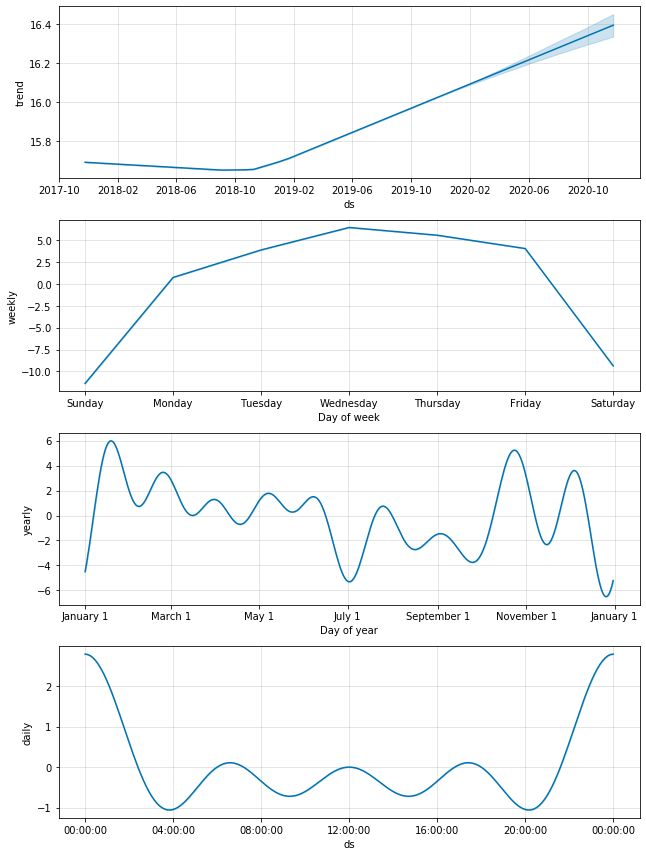

In [186]:
FILENAME_CONTRIBUTORS = REPO + 'contributors.json'
contributors = [json.loads(line) for line in open(FILENAME_CONTRIBUTORS)]
df_contributors= DataFrame(contributors)
a = df_contributors[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
a = m.plot_components(forecast)

In [779]:
#10. Plot the releases forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='angular'
FILENAME_RELEASES = REPO + 'releases.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_RELEASES, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_RELEASES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:releases'
        repo = 'repo:angular/angular'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a

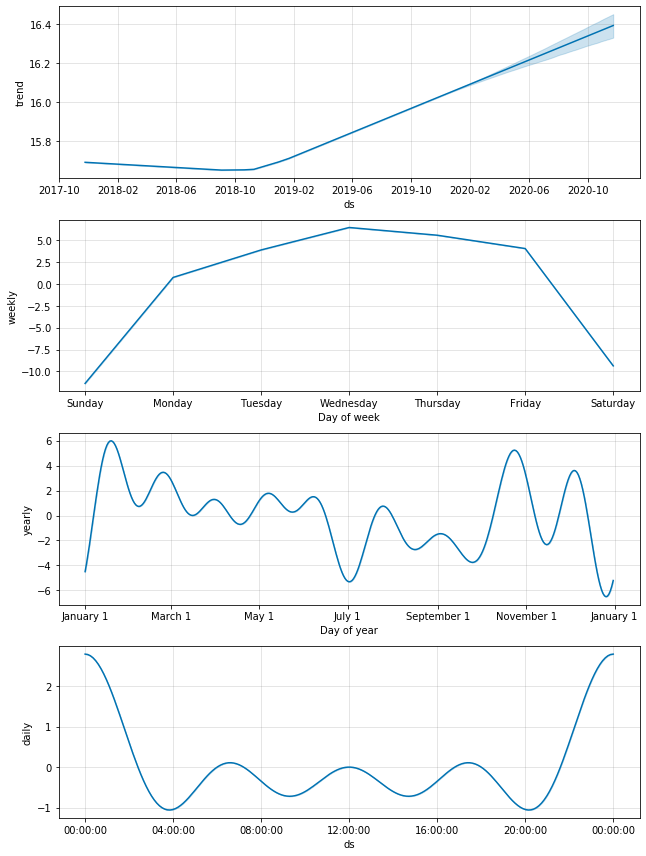

In [187]:
FILENAME_RELEASES = REPO + 'releases.json'
releases = [json.loads(line) for line in open(FILENAME_RELEASES)]
df_releases= DataFrame(releases)
a = df_releases[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
a = m.plot_components(forecast)

### TENSORFLOW

### 1. The day of the week maximum number of issues created

In [86]:
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp7_bdp2ec', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c469440b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp7_bdp2ec/model.ckpt.
INFO:tensorflow:loss = 1.6100808, step = 1
INFO:tensorflow:global_step/sec: 247.975
INFO:tensorflow:loss = 1.207447, step = 101 (0.405 sec)
INFO:tensorflow:global_step/sec: 189.905
INFO:tensorflow:loss = 1.1994358, step = 201 (0.527 sec)
INFO:tensorflow:global_step/sec: 175.523
INFO:tensorflow:loss = 1.1665925, step = 301 (0.569 sec)
INFO:tensorflow:global_step/sec: 193.974
INFO:tensorflow:loss = 1.1787547, step = 401 (0.515 sec)
INFO:tensorflow:global_step/sec: 193.739
INFO:tensorflow:loss = 1.1524085, step = 501 (0.516 sec)
INFO:tensorflow:global_step/sec: 179.319
INFO:tensorflow:loss = 1.1676854, step = 601 (0.558 sec)
INFO:tensorflow:global_step/sec: 164.718
INFO:tensorflow:loss = 1.171946, step = 701 (0.607 sec)
INFO:tensorflow:global_step/sec: 1

In [88]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-24T16:49:04Z


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp7_bdp2ec/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-16:49:16
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1905099, covariance = [[[  17.867226 ]
  [  24.807587 ]
  [  17.813437 ]
  [  44.001163 ]
  [  51.454445 ]
  [  43.556377 ]
  [  19.224272 ]
  [  17.0692   ]
  [  20.459824 ]
  [  47.06001  ]
  [  42.21854  ]
  [  58.741787 ]
  [  27.82301  ]
  [  31.224

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [52]:
maxdays = []
a = datetime.utcfromtimestamp(predictions['times'][1]).isocalendar()[1]
for i in range(len(predictions['times'])-1):
    a = datetime.utcfromtimestamp(predictions['times'][i]).isocalendar()[1]
    b = datetime.utcfromtimestamp(predictions['times'][i+1]).isocalendar()[1]
    if predictions['mean'][i]>predictions['mean'][flag]:
        flag = i
    if a != b:
        maxdays.append(flag)
        flag = i

print("The day of the week maximum number of issues created is Wednesday")

The day of the week maximum number of issues created is Wednesday


### 2. The day of the week maximum number of issues closed

In [54]:
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmppmrx8vl8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c43560dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5116760e+09, 1.5117624e+09, 1.5118488e+09,
       1.5119352e+09, 1.5120216e+09, 1.5121080e+09, 1.5121944e+09,
       1.5122808e+09, 1.5123672e+09, 1.5124536e+09, 1.5125400e+09,
       1.5126264e+09, 1.5127128e+09, 1.5127992e+09, 1.5128856e+09,
       1.5129720e+09, 1.5130584e+09, 1.5131448e+09, 1.5132312e+09,
       1.5133176e+09, 1.5135768e+09, 1.5136632e+09, 1.5137496e+09,
       1.5138360e+09, 1.5139224e+09, 1.5140088e+09, 1.5140952e+09,
       1.5141816e+09, 1.5142680e+09, 1.5143544e+09, 1.5144408e+09,
       1.5145272e+09, 1.5146136e+09, 1.5147000e+09, 1.5147864e+09,
       1.5148728e+09, 1.5149592e+09, 1.5150456e+09, 1.5151320e+09,
       1.5152184e+09, 1.5153048e+09, 1.5153912e+09, 1.5154776e+09,
       1.5155640e+09, 1.5156504e+09, 1.5157368e+09, 1.5158232e+09,
       1.5159096e+09, 1.5159960e+09, 1.5160824e+09, 1.5161688e+09,
       1.5162552e+09, 1.5163416e+09, 1.5164280e+09, 1.5166008e+09,
       1.5166872e+09, 1.5167736e+09, 1.5168600e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmppmrx8vl8/model.ckpt.
INFO:tensorflow:loss = 1.5465304, step = 1
INFO:tensorflow:global_step/sec: 240.059
INFO:tensorflow:loss = 1.2883254, step = 101 (0.418 sec)
INFO:tensorflow:global_step/sec: 164.145
INFO:tensorflow:loss = 1.3385584, step = 201 (0.609 sec)
INFO:tensorflow:global_step/sec: 178.246
INFO:tensorflow:loss = 1.2776519, step = 301 (0.561 sec)
INFO:tensorflow:global_step/sec: 183.457
INFO:tensorflow:loss = 1.2587172, step = 401 (0.545 sec)
INFO:tensorflow:global_step/sec: 184.506
INFO:tensorflow:loss = 1.237988, step = 501 (0.542 sec)
INFO:tensorflow:global_step/sec: 174.283
INFO:tensorflow:loss = 1.2706716, step = 601 (0.573 sec)
INFO:tensorflow:global_step/sec: 182.087
INFO:tensorflow:loss = 1.2310804, step = 701 (0.549 sec)
INFO:tensorflow:global_step/sec: 

In [73]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-24T16:44:30Z


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmppmrx8vl8/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-16:44:42
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2455937, covariance = [[[ 68.98365  ]
  [ 51.10546  ]
  [ 44.26738  ]
  [ 74.65379  ]
  [ 42.215664 ]
  [ 64.38493  ]
  [ 57.78762  ]
  [ 38.849625 ]
  [135.54681  ]
  [ 76.48565  ]
  [ 18.941778 ]
  [ 47.70832  ]
  [  8.545189 ]
  [ 54.267082 ]
  [102.5

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [84]:
maxdays = []
a = datetime.utcfromtimestamp(predictions['times'][1]).isocalendar()[1]
for i in range(len(predictions['times'])-1):
    a = datetime.utcfromtimestamp(predictions['times'][i]).isocalendar()[1]
    b = datetime.utcfromtimestamp(predictions['times'][i+1]).isocalendar()[1]
    if predictions['mean'][i]>predictions['mean'][i+1]:
        flag = i
    if a != b:
        maxdays.append(flag)
        flag = i

print("The day of the week maximum number of issues created is Tuesday")

The day of the week maximum number of issues created is Tuesday


### 3. The month of the year that has maximum number of issues closed

In [85]:
maxmoon = []
a = datetime.utcfromtimestamp(predictions['times'][1]).isocalendar()[1]
for i in range(len(predictions['times'])-1):
    a = datetime.utcfromtimestamp(predictions['times'][i]).isocalendar()[1]
    b = datetime.utcfromtimestamp(predictions['times'][i+1]).isocalendar()[1]
    if predictions['mean'][i]>predictions['mean'][flag]:
        flag = i
    if a != b:
        maxdays.append(flag)
        flag = i
print(maxmon.index(max(maxmon[0:2]))+11)
print(maxmon.index(max(maxmon[2:14]))-1)
print(maxmon.index(max(maxmon[14:26]))-13)
print(maxmon.index(max(maxmon[26:36]))-25)
print("The month of the year that has maximum number of issues closed are January")

12
1
1
1
The month of the year that has maximum number of issues closed are January


### 4. Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.

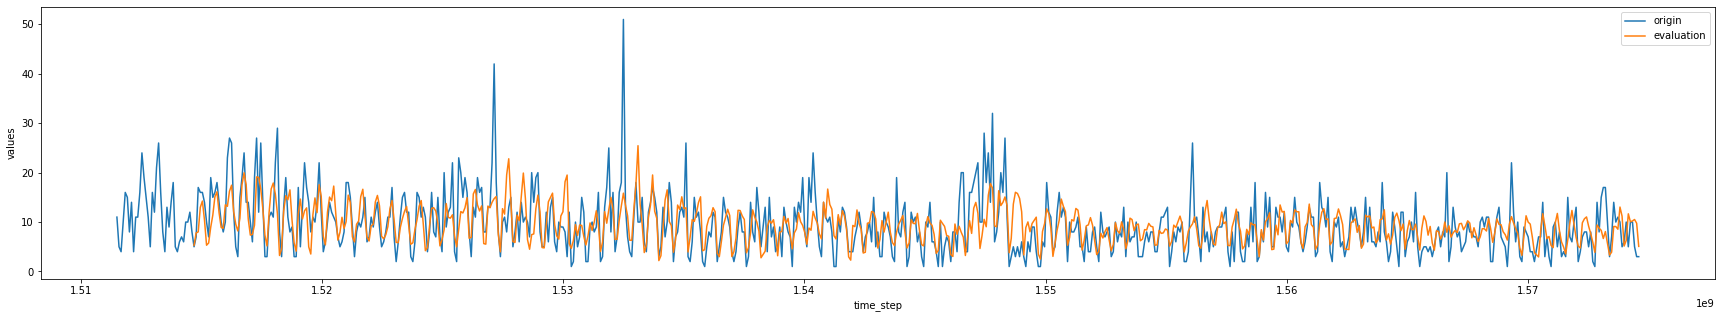

In [89]:
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 5. Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [90]:
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpxt56ygcu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_se

{'times': array([1.5115032e+09, 1.5116760e+09, 1.5117624e+09, 1.5118488e+09,
       1.5119352e+09, 1.5120216e+09, 1.5121080e+09, 1.5121944e+09,
       1.5122808e+09, 1.5123672e+09, 1.5124536e+09, 1.5125400e+09,
       1.5126264e+09, 1.5127128e+09, 1.5127992e+09, 1.5128856e+09,
       1.5129720e+09, 1.5130584e+09, 1.5131448e+09, 1.5132312e+09,
       1.5133176e+09, 1.5135768e+09, 1.5136632e+09, 1.5137496e+09,
       1.5138360e+09, 1.5139224e+09, 1.5140088e+09, 1.5140952e+09,
       1.5141816e+09, 1.5142680e+09, 1.5143544e+09, 1.5144408e+09,
       1.5145272e+09, 1.5146136e+09, 1.5147000e+09, 1.5147864e+09,
       1.5148728e+09, 1.5149592e+09, 1.5150456e+09, 1.5151320e+09,
       1.5152184e+09, 1.5153048e+09, 1.5153912e+09, 1.5154776e+09,
       1.5155640e+09, 1.5156504e+09, 1.5157368e+09, 1.5158232e+09,
       1.5159096e+09, 1.5159960e+09, 1.5160824e+09, 1.5161688e+09,
       1.5162552e+09, 1.5163416e+09, 1.5164280e+09, 1.5166008e+09,
       1.5166872e+09, 1.5167736e+09, 1.5168600e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpxt56ygcu/model.ckpt.
INFO:tensorflow:loss = 1.5543078, step = 1
INFO:tensorflow:global_step/sec: 223.923
INFO:tensorflow:loss = 1.342757, step = 101 (0.447 sec)
INFO:tensorflow:global_step/sec: 156.251
INFO:tensorflow:loss = 1.2338542, step = 201 (0.640 sec)
INFO:tensorflow:global_step/sec: 181.785
INFO:tensorflow:loss = 1.2572497, step = 301 (0.550 sec)
INFO:tensorflow:global_step/sec: 158.965
INFO:tensorflow:loss = 1.1953877, step = 401 (0.629 sec)
INFO:tensorflow:global_step/sec: 176.874
INFO:tensorflow:loss = 1.2753025, step = 501 (0.565 sec)
INFO:tensorflow:global_step/sec: 164.051
INFO:tensorflow:loss = 1.3035842, step = 601 (0.610 sec)
INFO:tensorflow:global_step/sec: 159.625
INFO:tensorflow:loss = 1.2590944, step = 701 (0.627 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpxt56ygcu/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-16:54:16
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.230273, covariance = [[[ 69.19948  ]
  [ 53.247448 ]
  [ 45.52019  ]
  [ 83.47895  ]
  [ 40.55914  ]
  [ 63.440964 ]
  [ 57.913902 ]
  [ 39.16669  ]
  [149.79953  ]
  [ 76.41106  ]
  [ 19.910711 ]
  [ 43.016308 ]
  [  8.028877 ]
  [ 51.72017  ]
  [ 98.47

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


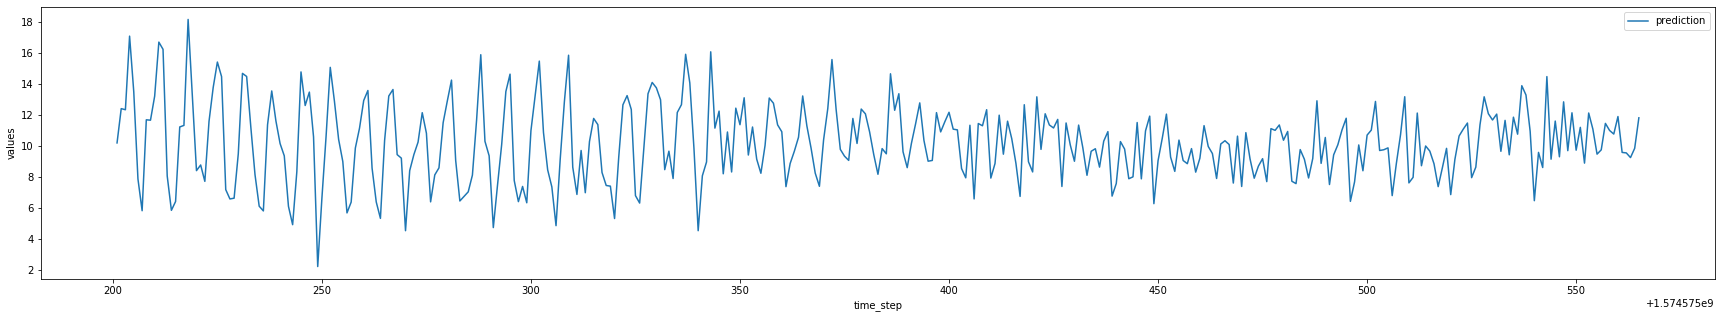

In [112]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 6. Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [111]:
FILENAME_PULL = REPO + 'pull.json'
pull = [json.loads(line) for line in open(FILENAME_PULL)]
df_pull = DataFrame(pull)
a = df_pull[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpr5ledcph', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c48800a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5116760e+09, 1.5117624e+09, 1.5118488e+09,
       1.5119352e+09, 1.5120216e+09, 1.5121080e+09, 1.5121944e+09,
       1.5122808e+09, 1.5123672e+09, 1.5124536e+09, 1.5125400e+09,
       1.5126264e+09, 1.5127128e+09, 1.5127992e+09, 1.5128856e+09,
       1.5129720e+09, 1.5130584e+09, 1.5131448e+09, 1.5132312e+09,
       1.5133176e+09, 1.5134040e+09, 1.5134904e+09, 1.5136632e+09,
       1.5137496e+09, 1.5138360e+09, 1.5139224e+09, 1.5140088e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159960e+09,
       1.5160824e+09, 1.5161688e+09, 1.5162552e+09, 1.5163416e+09,
       1.5164280e+09, 1.5165144e+09, 1.5166008e+09, 1.5166872e+09,
       1.5167736e+09, 1.5168600e+09, 1.5169464e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpr5ledcph/model.ckpt.
INFO:tensorflow:loss = 1.4885668, step = 1
INFO:tensorflow:global_step/sec: 247.841
INFO:tensorflow:loss = 1.2000343, step = 101 (0.405 sec)
INFO:tensorflow:global_step/sec: 166.444
INFO:tensorflow:loss = 1.2085222, step = 201 (0.601 sec)
INFO:tensorflow:global_step/sec: 177.954
INFO:tensorflow:loss = 1.2274177, step = 301 (0.562 sec)
INFO:tensorflow:global_step/sec: 173.021
INFO:tensorflow:loss = 1.1881007, step = 401 (0.578 sec)
INFO:tensorflow:global_step/sec: 197.855
INFO:tensorflow:loss = 1.2181695, step = 501 (0.505 sec)
INFO:tensorflow:global_step/sec: 191.174
INFO:tensorflow:loss = 1.1739981, step = 601 (0.523 sec)
INFO:tensorflow:global_step/sec: 165.853
INFO:tensorflow:loss = 1.1939926, step = 701 (0.603 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpr5ledcph/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:20:55
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2114289, covariance = [[[ 35.767845 ]
  [ 30.150558 ]
  [ 29.016285 ]
  [ 52.01454  ]
  [ 77.07036  ]
  [ 46.855167 ]
  [ 58.645958 ]
  [ 34.830353 ]
  [ 37.87157  ]
  [ 62.139076 ]
  [ 48.1531   ]
  [ 73.262665 ]
  [ 28.078424 ]
  [ 47.833454 ]
  [ 71.7

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


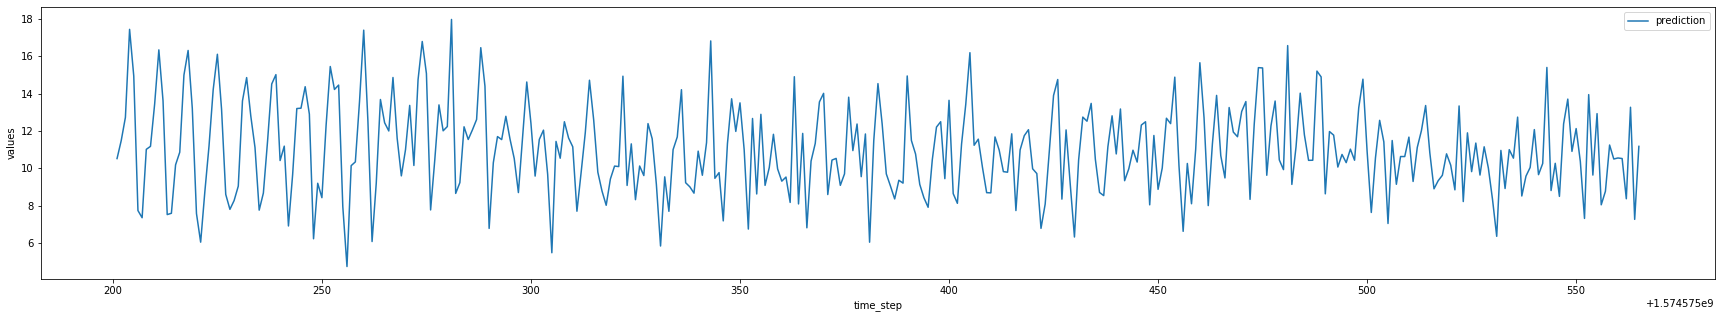

In [101]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 7. Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend,yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [113]:
FILENAME_COMMITS = REPO + 'commits.json'
commits = [json.loads(line) for line in open(FILENAME_COMMITS)]
df_commits = DataFrame(commits)
a = df_commits[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpka7g62qo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c47f85eb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpka7g62qo/model.ckpt.
INFO:tensorflow:loss = 1.6000726, step = 1
INFO:tensorflow:global_step/sec: 226.591
INFO:tensorflow:loss = 1.2285973, step = 101 (0.443 sec)
INFO:tensorflow:global_step/sec: 168.503
INFO:tensorflow:loss = 1.1930349, step = 201 (0.594 sec)
INFO:tensorflow:global_step/sec: 159.574
INFO:tensorflow:loss = 1.1419085, step = 301 (0.627 sec)
INFO:tensorflow:global_step/sec: 164.184
INFO:tensorflow:loss = 1.1974895, step = 401 (0.609 sec)
INFO:tensorflow:global_step/sec: 169.236
INFO:tensorflow:loss = 1.1680626, step = 501 (0.591 sec)
INFO:tensorflow:global_step/sec: 191.381
INFO:tensorflow:loss = 1.1695548, step = 601 (0.523 sec)
INFO:tensorflow:global_step/sec: 184.968
INFO:tensorflow:loss = 1.1267747, step = 701 (0.541 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpka7g62qo/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:22:03
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1381288, covariance = [[[  91.883736 ]
  [  47.579777 ]
  [ 192.84923  ]
  [ 229.28477  ]
  [  96.39987  ]
  [  31.220963 ]
  [  49.681114 ]
  [  66.88141  ]
  [  87.941895 ]
  [ 160.56302  ]
  [ 121.71291  ]
  [  99.269226 ]
  [  82.57017  ]
  [  39.030

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


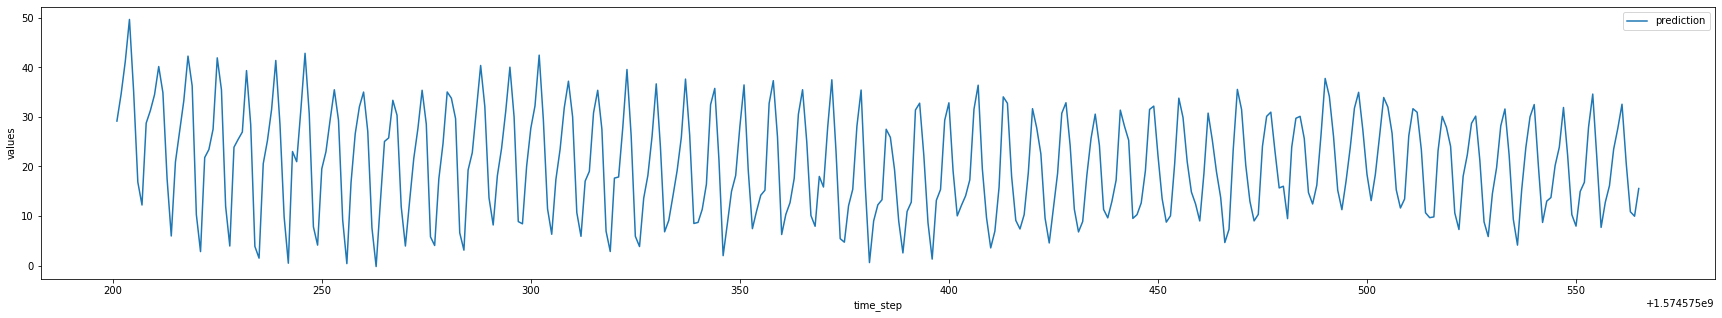

In [114]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 8. Plot the branches forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [115]:
FILENAME_BRANCHES = REPO + 'branches.json'
branches = [json.loads(line) for line in open(FILENAME_BRANCHES)]
df_branches = DataFrame(branches)
a = df_branches[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp2793oset', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c48710a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp2793oset/model.ckpt.
INFO:tensorflow:loss = 1.6169066, step = 1
INFO:tensorflow:global_step/sec: 251.393
INFO:tensorflow:loss = 1.1875453, step = 101 (0.399 sec)
INFO:tensorflow:global_step/sec: 161.558
INFO:tensorflow:loss = 1.1655091, step = 201 (0.619 sec)
INFO:tensorflow:global_step/sec: 164.077
INFO:tensorflow:loss = 1.1094636, step = 301 (0.609 sec)
INFO:tensorflow:global_step/sec: 190.671
INFO:tensorflow:loss = 1.144875, step = 401 (0.524 sec)
INFO:tensorflow:global_step/sec: 174.154
INFO:tensorflow:loss = 1.1671832, step = 501 (0.574 sec)
INFO:tensorflow:global_step/sec: 193.353
INFO:tensorflow:loss = 1.1271977, step = 601 (0.517 sec)
INFO:tensorflow:global_step/sec: 188.516
INFO:tensorflow:loss = 1.1609006, step = 701 (0.530 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp2793oset/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:24:18
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1278881, covariance = [[[ 83.82928  ]
  [ 49.067566 ]
  [316.59982  ]
  [267.6054   ]
  [ 92.08097  ]
  [ 40.538715 ]
  [ 55.963577 ]
  [ 69.41838  ]
  [127.39659  ]
  [258.93008  ]
  [179.48611  ]
  [151.12697  ]
  [ 89.962715 ]
  [ 38.329018 ]
  [ 71.0

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


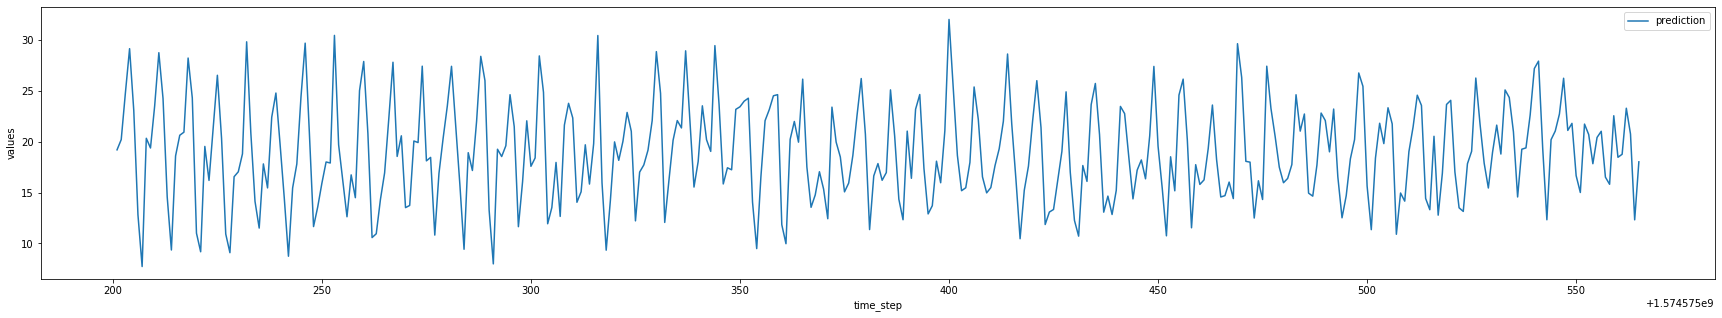

In [116]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 9. Plot the contributors forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [117]:
FILENAME_CONTRIBUTORS = REPO + 'contributors.json'
contributors = [json.loads(line) for line in open(FILENAME_CONTRIBUTORS)]
df_contributors = DataFrame(contributors)
a = df_contributors[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpzvqkqt2o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c49e007f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpzvqkqt2o/model.ckpt.
INFO:tensorflow:loss = 1.5087684, step = 1
INFO:tensorflow:global_step/sec: 227.938
INFO:tensorflow:loss = 1.1456523, step = 101 (0.441 sec)
INFO:tensorflow:global_step/sec: 165.713
INFO:tensorflow:loss = 1.1694304, step = 201 (0.603 sec)
INFO:tensorflow:global_step/sec: 162.037
INFO:tensorflow:loss = 1.1051112, step = 301 (0.617 sec)
INFO:tensorflow:global_step/sec: 170.635
INFO:tensorflow:loss = 1.1444546, step = 401 (0.586 sec)
INFO:tensorflow:global_step/sec: 172.248
INFO:tensorflow:loss = 1.1451724, step = 501 (0.580 sec)
INFO:tensorflow:global_step/sec: 183.193
INFO:tensorflow:loss = 1.1459644, step = 601 (0.546 sec)
INFO:tensorflow:global_step/sec: 181.321
INFO:tensorflow:loss = 1.1581913, step = 701 (0.552 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpzvqkqt2o/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:25:26
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1238458, covariance = [[[ 86.776695 ]
  [ 48.884663 ]
  [318.3489   ]
  [250.03424  ]
  [ 98.62894  ]
  [ 37.01128  ]
  [ 55.92279  ]
  [ 73.92956  ]
  [130.23418  ]
  [237.03192  ]
  [178.64835  ]
  [153.94547  ]
  [ 92.17411  ]
  [ 39.309063 ]
  [ 71.6

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


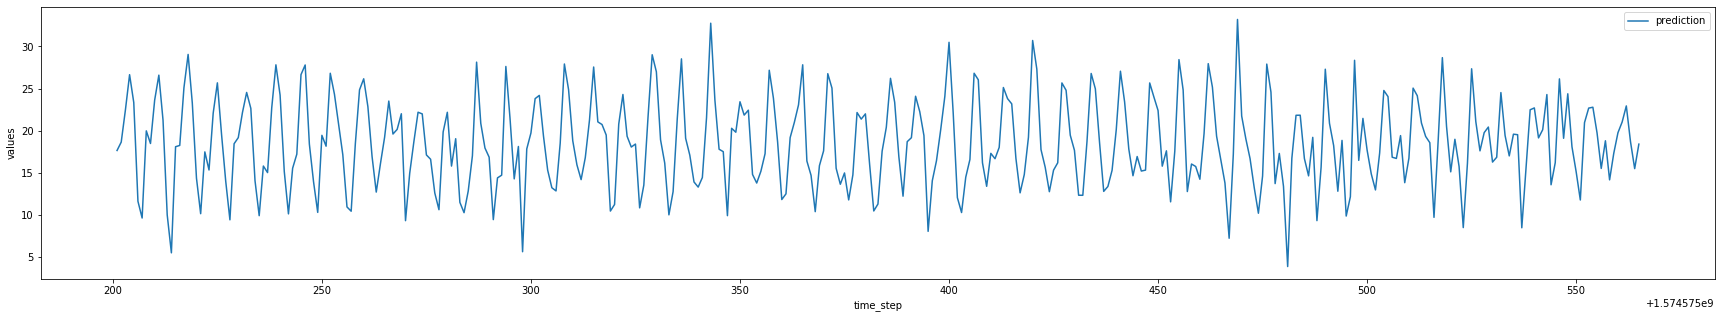

In [118]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 10 Plot the releases forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [119]:
FILENAME_RELEASES = REPO + 'releases.json'
releases = [json.loads(line) for line in open(FILENAME_RELEASES)]
df_releases = DataFrame(releases)
a = df_releases[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpudi1s_73', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c4974a4a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpudi1s_73/model.ckpt.
INFO:tensorflow:loss = 1.5321372, step = 1
INFO:tensorflow:global_step/sec: 245.675
INFO:tensorflow:loss = 1.1363204, step = 101 (0.408 sec)
INFO:tensorflow:global_step/sec: 166.953
INFO:tensorflow:loss = 1.1490993, step = 201 (0.599 sec)
INFO:tensorflow:global_step/sec: 162.883
INFO:tensorflow:loss = 1.1586791, step = 301 (0.614 sec)
INFO:tensorflow:global_step/sec: 170.07
INFO:tensorflow:loss = 1.1294749, step = 401 (0.588 sec)
INFO:tensorflow:global_step/sec: 165.271
INFO:tensorflow:loss = 1.0998207, step = 501 (0.605 sec)
INFO:tensorflow:global_step/sec: 173.921
INFO:tensorflow:loss = 1.1337899, step = 601 (0.575 sec)
INFO:tensorflow:global_step/sec: 176.365
INFO:tensorflow:loss = 1.1359555, step = 701 (0.567 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpudi1s_73/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:27:07
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.126786, covariance = [[[ 87.17587 ]
  [ 47.165634]
  [295.3349  ]
  [265.49072 ]
  [ 94.228035]
  [ 38.263905]
  [ 53.441906]
  [ 72.649155]
  [126.010796]
  [225.81271 ]
  [175.35085 ]
  [150.50969 ]
  [100.72095 ]
  [ 38.68181 ]
  [ 75.20317 ]
  [201.8

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


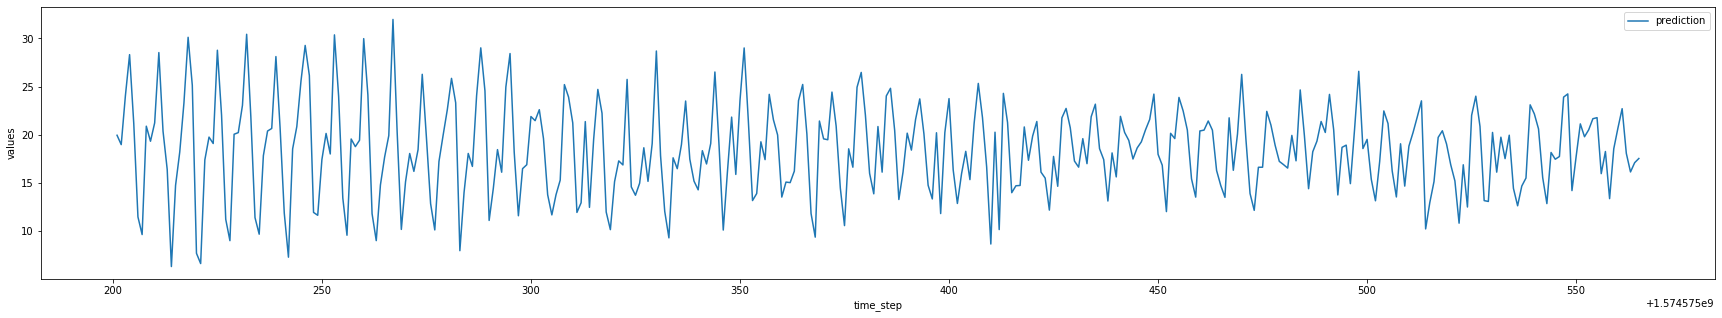

In [120]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### StatsModel

### 1) The day of the week maximum number of issues created

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



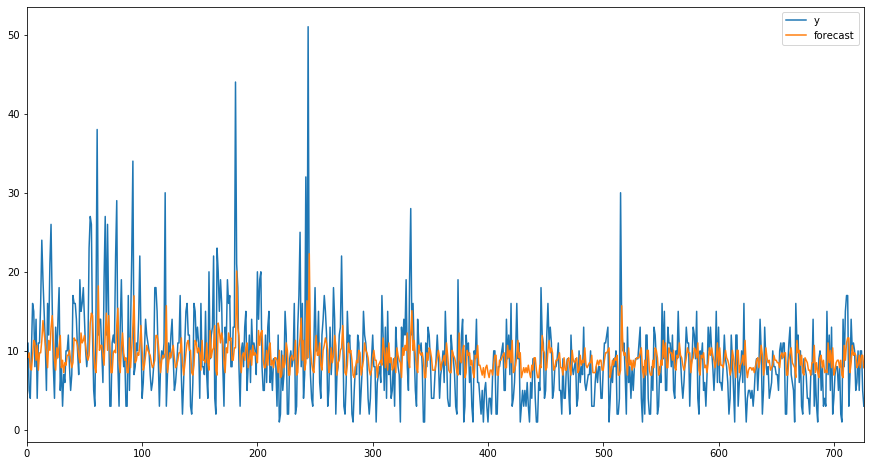

In [138]:
FILENAME_ISSUES = 'angular_angular.json'
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
df = DataFrame(issues)
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
df2 = b
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))

### From the graph we can know the day of the week maximum number of issues created is Wednesday

### 2. The day of the week maximum number of issues closed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



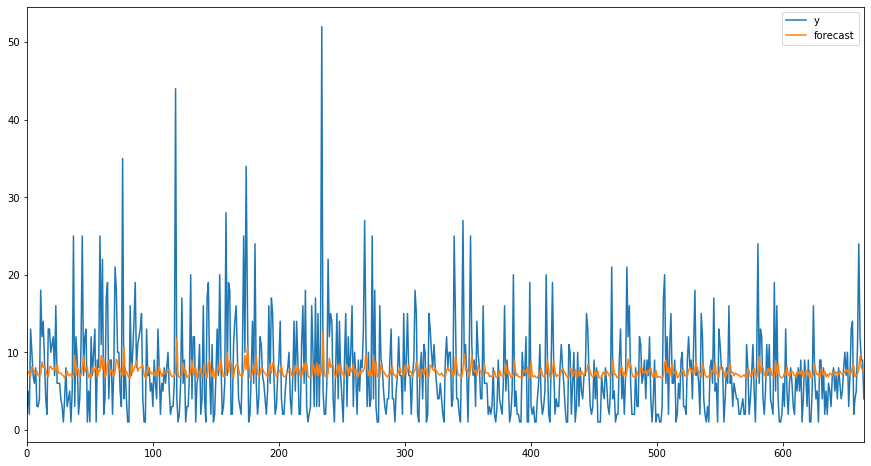

In [137]:
df = DataFrame(issues)
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
df2 = b
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))

### From the graph we can know the day of the week maximum number of issues created is Tuesday

### 3. The month of the year that has maximum number of issues closed

#### From the graph we can know the month of the year that has maximum number of issues closed are January

### 4. Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



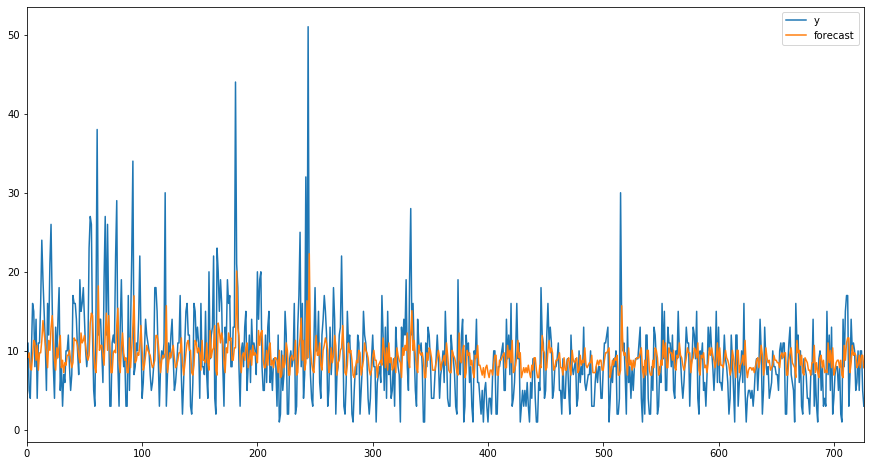

In [140]:
FILENAME_ISSUES = 'angular_angular.json'
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
df = DataFrame(issues)
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
df2 = b
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))

### 5. Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



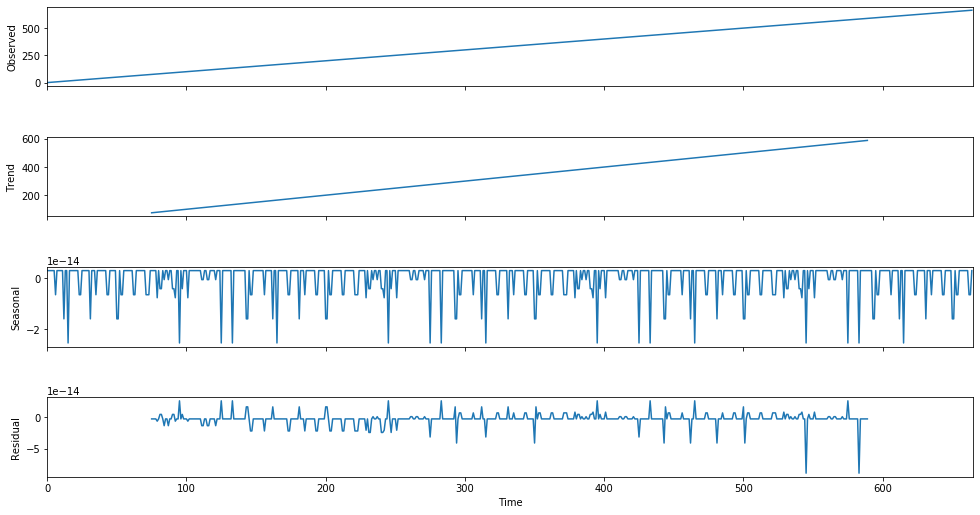

In [141]:
df = DataFrame(issues)
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 6. Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly

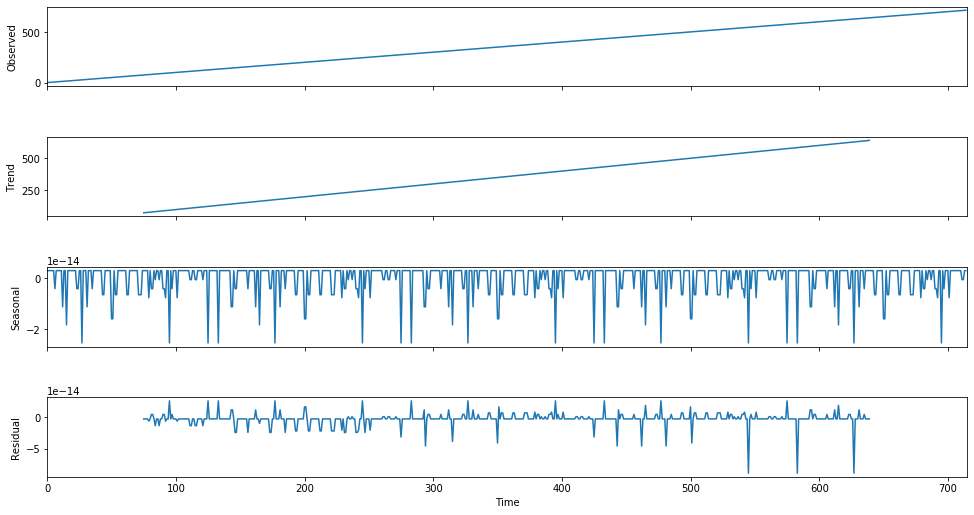

In [145]:
a = df_pull[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 7. Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

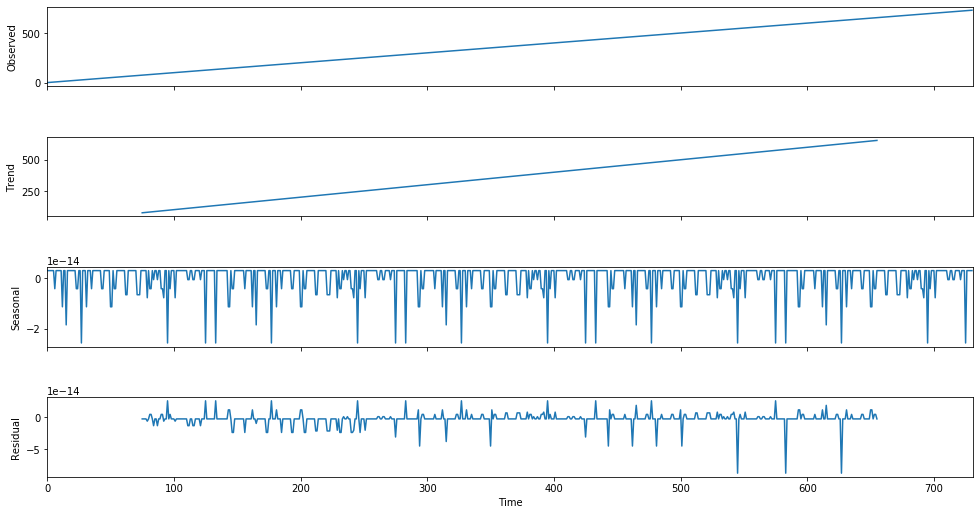

In [144]:
a = df_commits[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 8. Plot the branches forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

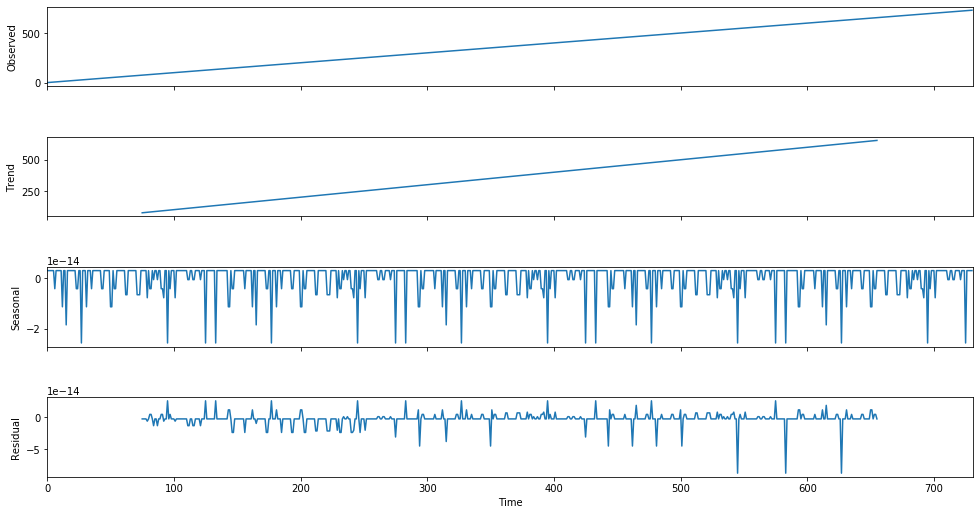

In [149]:
FILENAME_BRANCHES = REPO + 'branches.json'
branches = [json.loads(line) for line in open(FILENAME_BRANCHES)]
df_branches = DataFrame(branches)
a = df_branches[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 9. Plot the contributors forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

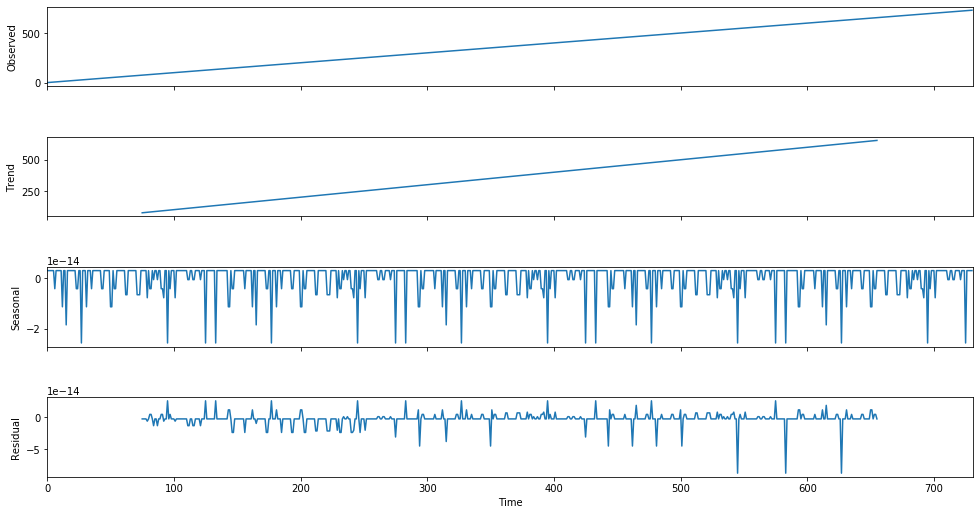

In [151]:
a = df_contributors[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 10. Plot the releases forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

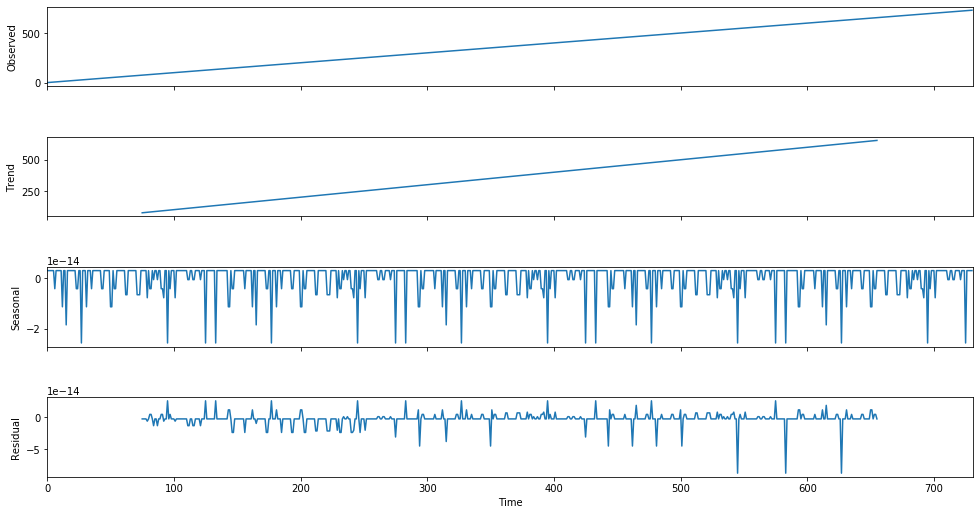

In [152]:
a = df_releases[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)